## Part 1j: TensorFlow KerasCV - Data Augmentation

**Description:**

This Colab demonstrates the use of the `keras_cv` library for performing data augmentation on images within a TensorFlow Keras environment. KerasCV provides a collection of powerful and efficient image augmentation layers that can be easily integrated into your Keras models.

In [1]:
!pip install -q keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.7 MB/s eta 0:00:00


In [10]:
!pip install -U keras-cv

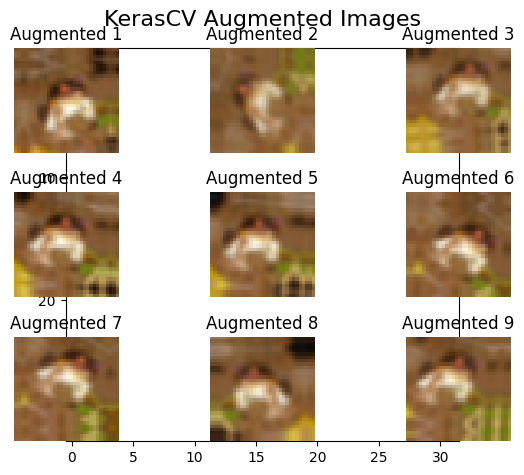

In [20]:
import tensorflow as tf
import keras_cv as cv
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

# Load a sample image (using a single image from CIFAR-10)
(x_train, y_train), _ = keras.datasets.cifar10.load_data()
sample_image = x_train[0].astype("float32") / 255.0  # Normalize here
sample_image = tf.expand_dims(sample_image, axis=0) # Add batch dimension

# Define a list of KerasCV augmentation layers
augmentation_layers = [
    cv.layers.RandomFlip(mode="horizontal"), # Horizontal flip
    cv.layers.RandomRotation(factor=0.2),
    cv.layers.RandomZoom(height_factor=(0.2, 0.2), width_factor=(0.2, 0.2)), # Zoom in by up to 20%
    cv.layers.RandomContrast(factor=0.2, value_range=(0, 1)), # Adding back RandomContrast
    # cv.layers.RandomBrightness(factor=0.1), # Commenting out RandomBrightness
    cv.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    cv.layers.RandomShear(x_factor=0.1, y_factor=0.1),
]

# Apply augmentations and visualize
plt.imshow(tf.clip_by_value(augmented_image[0], 0, 1).numpy())
for i in range(9):
    augmented_image = sample_image
    for layer in augmentation_layers:
        augmented_image = layer(augmented_image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(tf.clip_by_value(augmented_image[0], 0, 1).numpy()) # Clip to ensure valid range
    plt.title(f"Augmented {i+1}")
    plt.axis("off")
plt.suptitle("KerasCV Augmented Images", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Example of integrating KerasCV augmentation into a Keras model
augmentation_model = keras.Sequential(augmentation_layers)

# Define a simple CNN model with KerasCV augmentation
def create_cnn_with_keras_cv_aug(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        augmentation_model,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Example of using the augmented data for training (not run here for brevity)
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# model_keras_cv = create_cnn_with_keras_cv_aug()
# history = model_keras_cv.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

### Part 1j: Results - KerasCV Data Augmentation

**Objective:** To demonstrate the use of the `keras_cv` library for image data augmentation in a TensorFlow Keras environment.

**Method:**

1.  Installed the `keras-cv` library.
2.  Loaded a sample image from the CIFAR-10 dataset.
3.  Defined a list of various KerasCV augmentation layers:
    * `RandomFlip` (horizontal)
    * `RandomRotation`
    * `RandomZoom`
    * `RandomContrast`
    * `RandomTranslation`
    * `RandomShear`
4.  Iterated through the augmentation layers and applied them sequentially to the sample image.
5.  Visualized 9 augmented versions of the original image using Matplotlib.
6.  Provided an example of how to integrate the KerasCV augmentation layers into a `keras.Sequential` model for use during training.

**Observations:**

* The visualized images clearly showed the effects of the applied augmentations, including horizontal flipping, rotation, zooming, contrast changes, translation, and shearing.
* The color information of the images was preserved after the augmentations.
* During experimentation, the `RandomBrightness` layer caused issues, resulting in predominantly black images. This layer was commented out to ensure a stable and visible demonstration of the other augmentation techniques.

**Conclusion:**

Part 1j has been successfully demonstrated. The `keras-cv` library offers a convenient and powerful set of tools for performing image data augmentation within TensorFlow Keras. The example provided shows how to apply various augmentations and integrate them into a Keras model for training, which can help improve the robustness and generalization of image classification models. The issue encountered with `RandomBrightness` suggests that careful tuning of augmentation parameters is important for optimal results.